In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
data = pd.read_csv('C:/Users/SamDutse/Desktop/Curent Work/Diabetes/diabetes.csv')

In [3]:
#head of the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking information about data and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking the dimension of the data
data.shape

(768, 9)

In [6]:
#checking for null values in the data
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

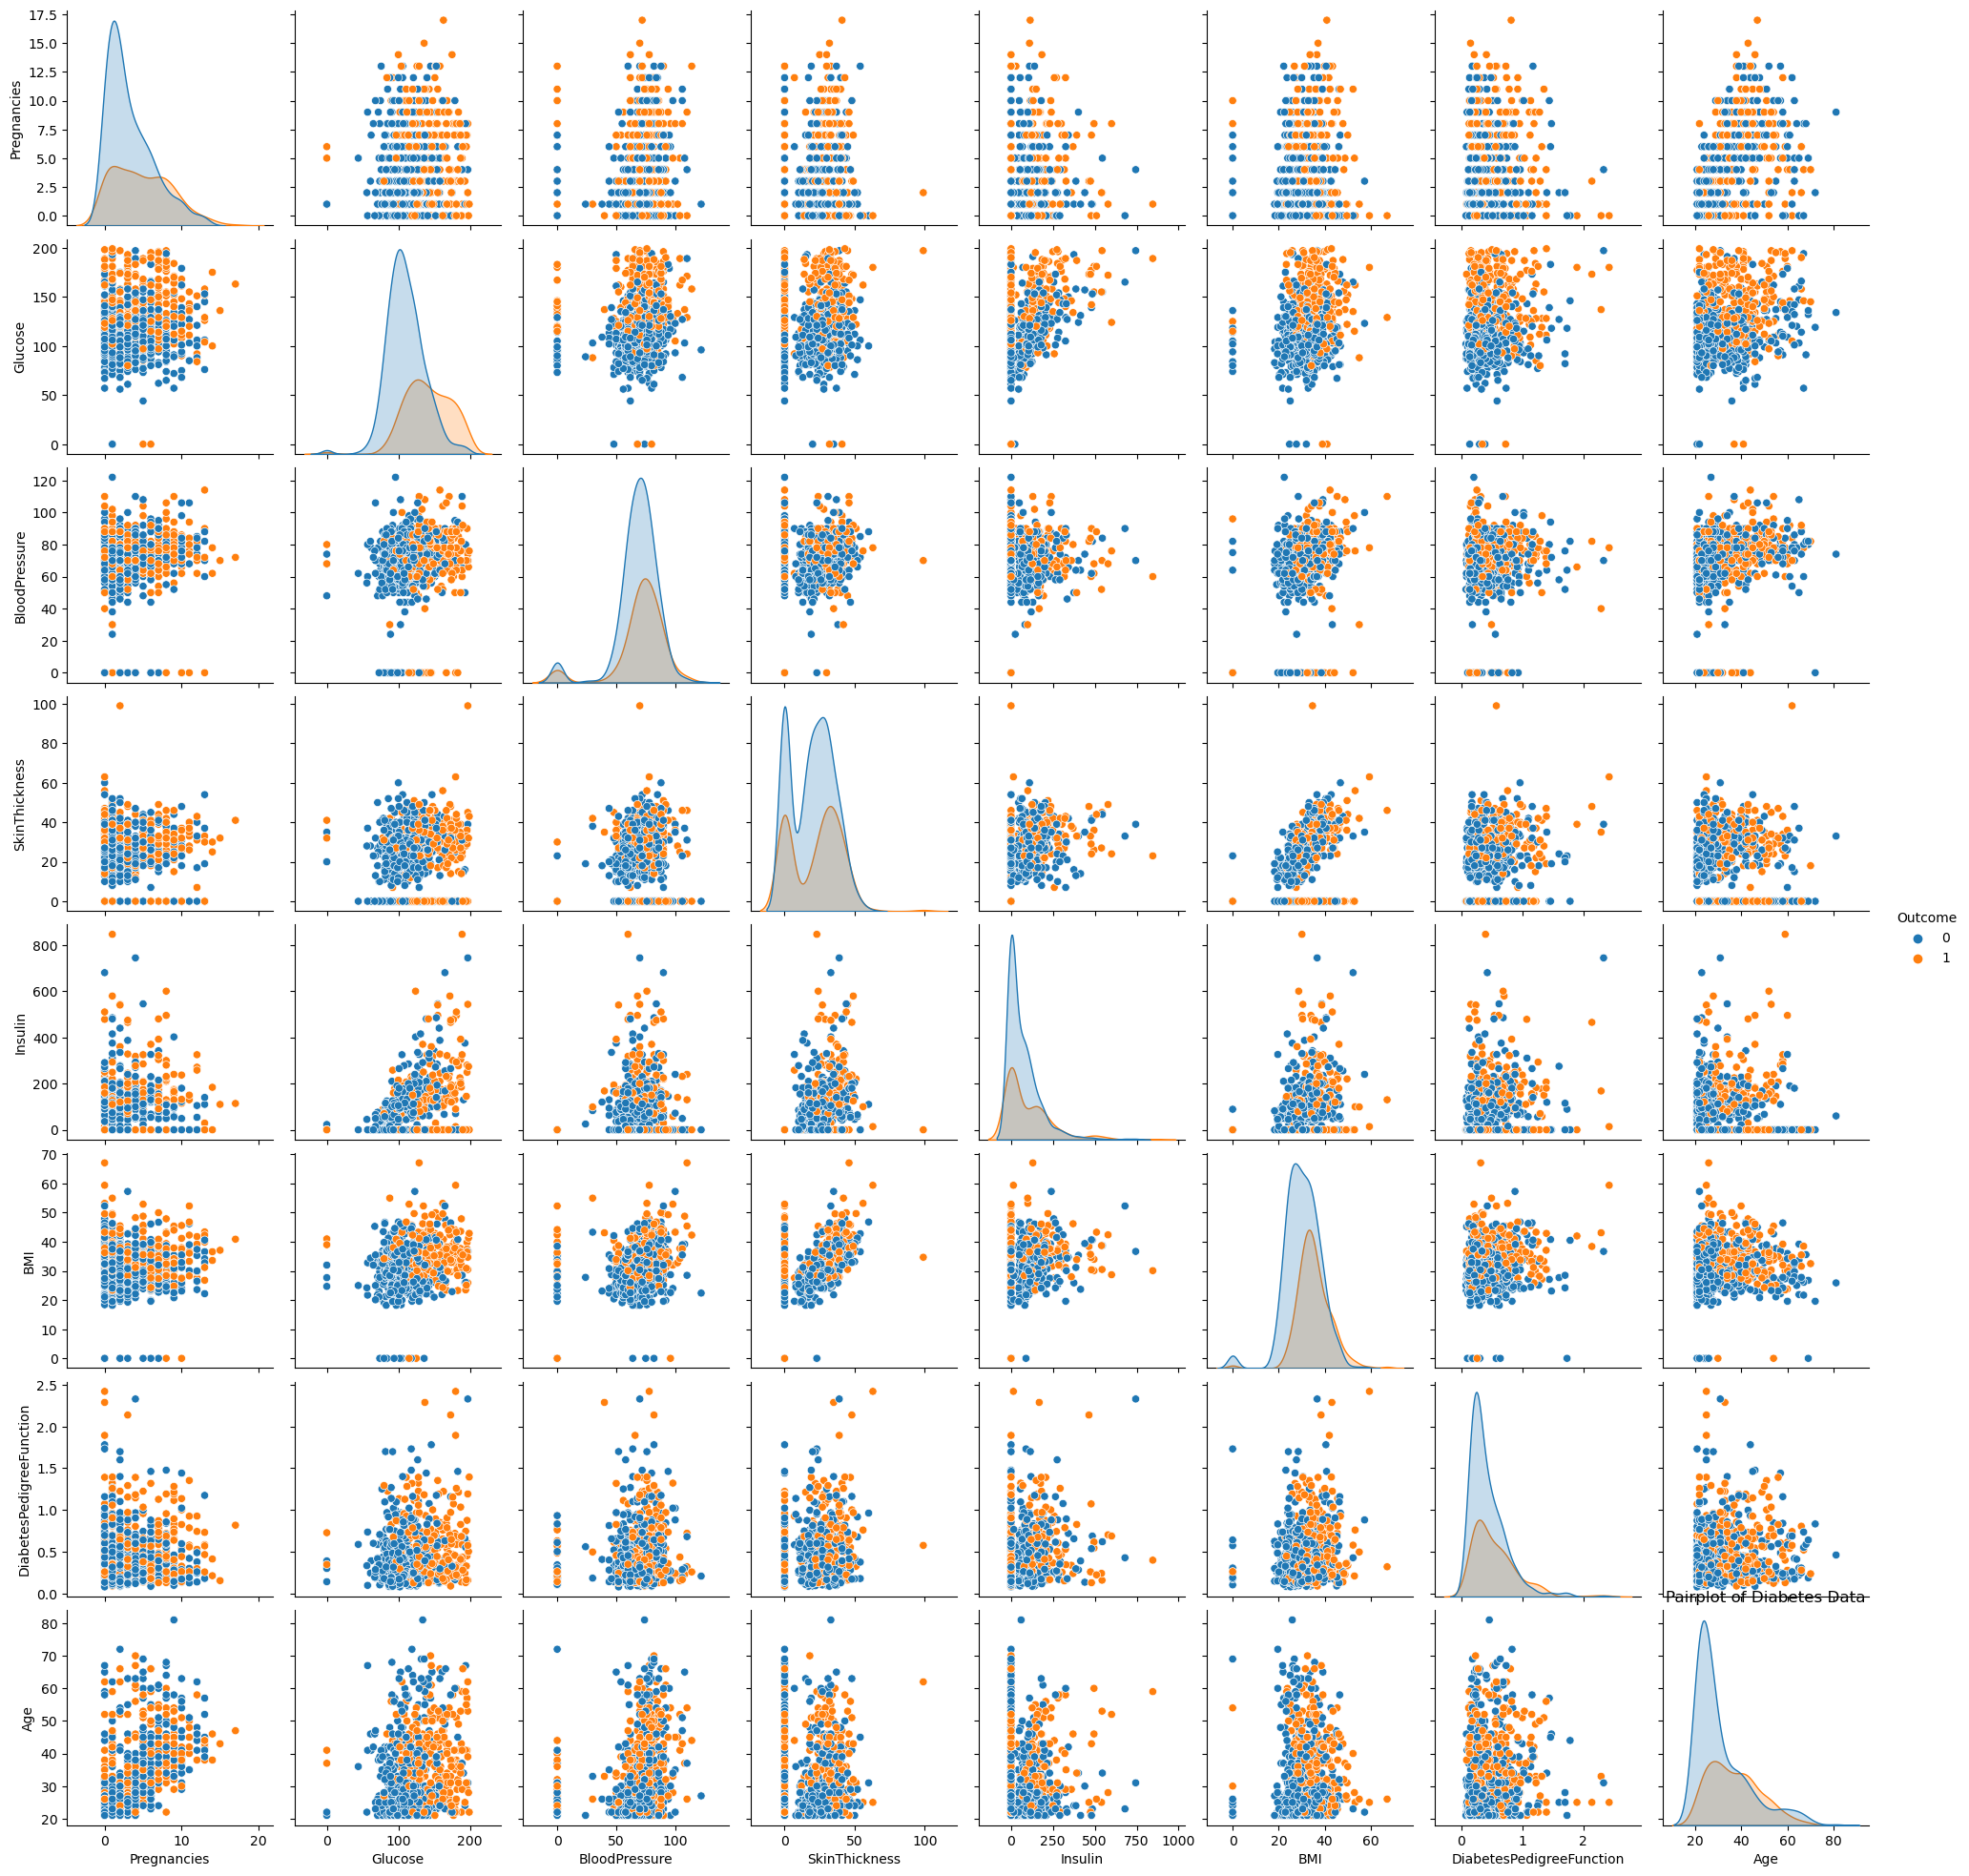

In [25]:
#data visualization
# Pairplot to visualize relationships between variables
sns.pairplot(data=data, hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Diabetes Data')
plt.show()

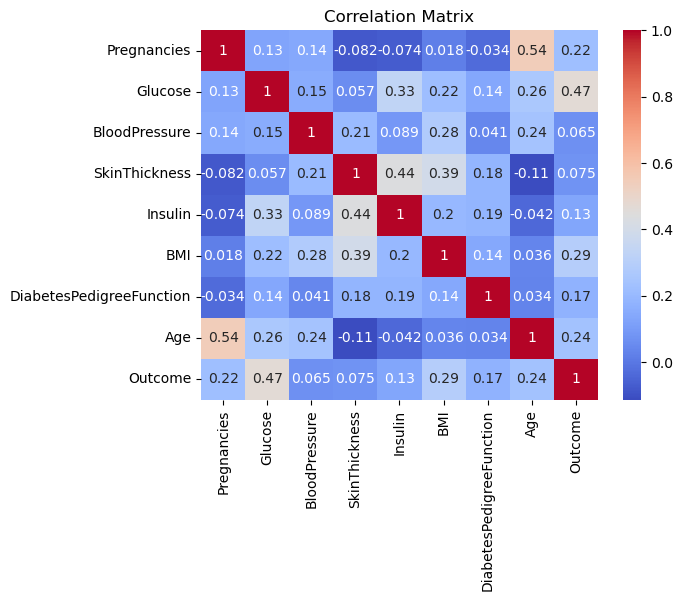

In [9]:
# Building the correlation matrix heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
#importing model and model selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
#splitting the data into training and testing dataset
X = data.drop(["Outcome"], axis=1) #training data
y = data["Outcome"] #testing data

In [12]:
#data splicing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

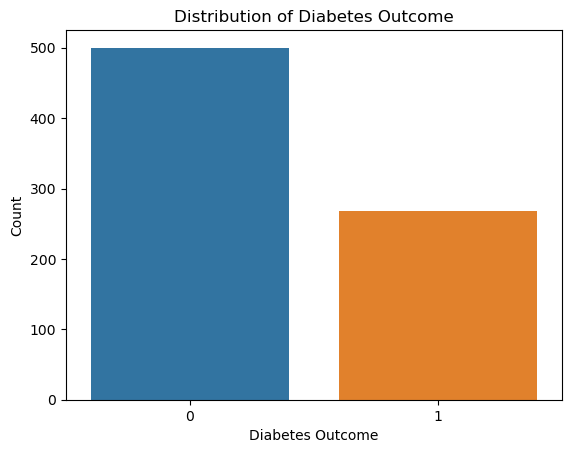

In [15]:
# Visualization of the distribution of the target variable
sns.countplot(x='Outcome', data=data)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [16]:
# Feature Importance Visualization
Classifier = LogisticRegression(random_state=0)
Classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
# Get the coefficients of the model
coefficients = pd.Series(Classifier.coef_[0], index=X.columns)

In [18]:
# Sort the coefficients by their absolute values
coefficients = coefficients.abs().sort_values()

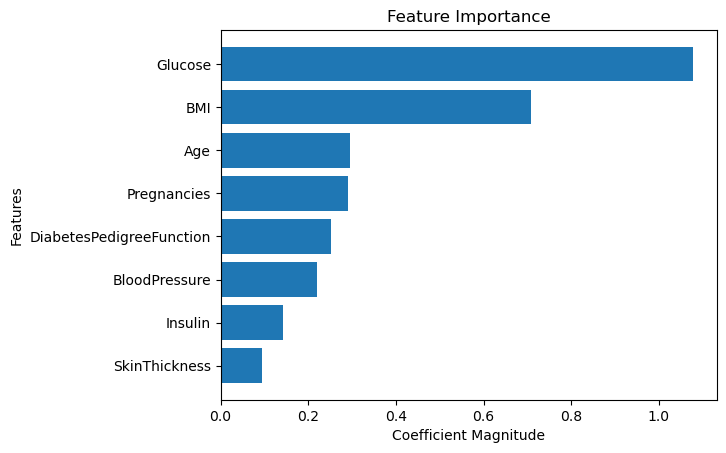

In [19]:
# Plot the feature importance
plt.barh(coefficients.index, coefficients.values)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [20]:
#predicting the test set result
y_pred = Classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
Cm = confusion_matrix(y_test, y_pred)
Cm

array([[141,  16],
       [ 35,  39]], dtype=int64)

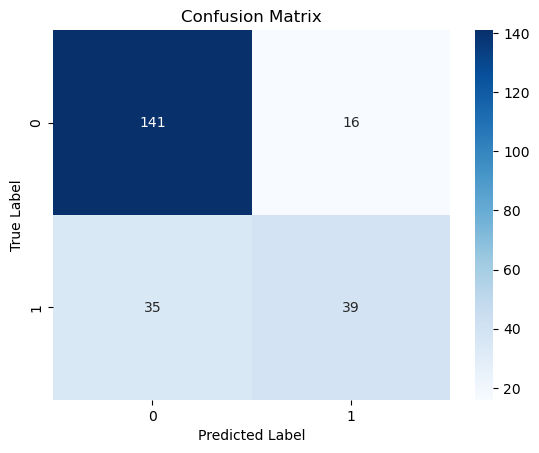

In [22]:
sns.heatmap(Cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
# Finding model accuracy - using the confusion matrix
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 77.92%
